<a href="https://colab.research.google.com/github/Nandini-Pandey/Hepatitis-C-Prediction/blob/main/MinorProject(Hepatitis_C_Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MINOR PROJECT**

HEPATITIS C PREDICTION

---






In [ ]:
!pip install kaggle
from google.colab import files
files.upload()


Saving hepatitisdataset.csv to hepatitisdataset.csv


{'hepatitisdataset.csv': b',Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT\r\n1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106,12.1,69\r\n2,0=Blood Donor,32,m,38.5,70.3,18,24.7,3.9,11.17,4.8,74,15.6,76.5\r\n3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.2,86,33.2,79.3\r\n4,0=Blood Donor,32,m,43.2,52,30.6,22.6,18.9,7.33,4.74,80,33.8,75.7\r\n5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76,29.9,68.7\r\n6,0=Blood Donor,32,m,41.6,43.3,18.5,19.7,12.3,9.92,6.05,111,91,74\r\n7,0=Blood Donor,32,m,46.3,41.3,17.5,17.8,8.5,7.01,4.79,70,16.9,74.5\r\n8,0=Blood Donor,32,m,42.2,41.9,35.8,31.1,16.1,5.82,4.6,109,21.5,67.1\r\n9,0=Blood Donor,32,m,50.9,65.5,23.2,21.2,6.9,8.69,4.1,83,13.7,71.3\r\n10,0=Blood Donor,32,m,42.4,86.3,20.3,20,35.2,5.46,4.45,81,15.9,69.9\r\n11,0=Blood Donor,32,m,44.3,52.3,21.7,22.4,17.2,4.15,3.57,78,24.1,75.4\r\n12,0=Blood Donor,33,m,46.4,68.2,10.3,20,5.7,7.36,4.3,79,18.7,68.6\r\n13,0=Blood Donor,33,m,36.3,78.6,23.6,22,7,8.56,5.38,78,19.4,68.7\

In [ ]:
import os
os.environ['KAGGLE_USERNAME']="nandini7pandey" # kaggle username
os.environ['KAGGLE_KEY']="b14bbc0002951423a9057ce3f7496d8b" # kaggle key
!kaggle datasets download -d fedesoriano/hepatitis-c-dataset # API command from dataset

  0% 0.00/14.8k [00:00<?, ?B/s]
100% 14.8k/14.8k [00:00<00:00, 30.2MB/s]


In [ ]:
!unzip hepatitis-c-dataset.zip

Archive:  hepatitis-c-dataset.zip
  inflating: HepatitisCdata.csv      


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns



In [ ]:
df = pd.read_csv('/content/HepatitisCdata.csv',encoding='latin')

In [ ]:
df.shape

(615, 14)

In [ ]:
df.head(100)

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0=Blood Donor,40,m,45.0,74.2,20.9,29.1,12.0,9.10,6.29,92.0,24.1,74.1
96,97,0=Blood Donor,40,m,39.1,66.5,33.3,32.9,14.8,7.87,4.91,88.0,18.5,68.8
97,98,0=Blood Donor,40,m,45.1,63.4,39.6,31.4,19.7,11.31,4.74,91.0,18.2,81.1
98,99,0=Blood Donor,40,m,45.4,52.9,41.3,26.2,10.6,10.27,6.85,82.0,40.2,76.6


In [ ]:
# removing feature "Unnamed" as it is not useful in our analysis
df.drop('Unnamed: 0' , axis=1,inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


In [ ]:
# To check missing values

df.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

Analysis: There are total 31 null(NaN) values in the provided dataset.

In [ ]:
# handling missing values
df['ALP'].replace(np.NaN,df['ALP'].mode()[0],inplace=True)
df['PROT'].replace(np.NaN,df['PROT'].mode()[0],inplace=True)
df['ALB'].replace(np.NaN,df['ALB'].mode()[0],inplace=True)
df['ALT'].replace(np.NaN,df['ALT'].mode()[0],inplace=True)
df['CHOL'].replace(np.NaN,df['CHOL'].mode()[0],inplace=True)


In [ ]:
# all missing values replaced with the most frequent value in the respective feature column.
df.isnull().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

In [ ]:
# distribution of various diagnosis categories in dataset
df['Category'].value_counts()

0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: Category, dtype: int64

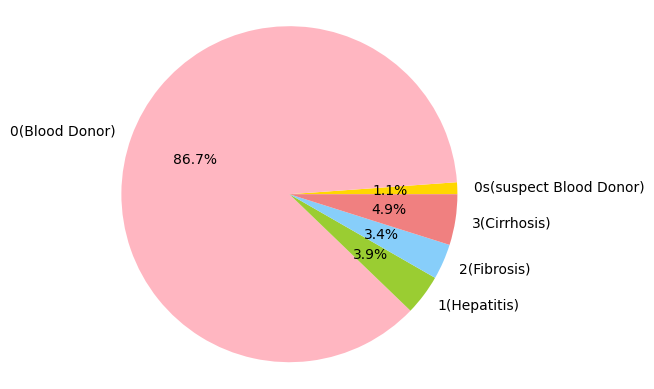

In [ ]:
# data to plot a distribution for category
labels='0s(suspect Blood Donor)','0(Blood Donor)','1(Hepatitis)','2(Fibrosis)','3(Cirrhosis)'
sizes=[7,533,24,21,30]
colors=['gold','lightpink','yellowgreen','lightskyblue','lightcoral']


# plot
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

Analysis : There are 5 diagnosis categories in the provided dataset. These are:
0=Blood Donor,
3=Cirrhosis,
1=Hepatitis,
2=Fibrosis and
0s=suspect Blood Donor

The pie chart above shows that more than half of the patients (86.7%) in the given dataset are blood donor (i.e negative hepatitis c diagnosis).

In [ ]:
# performing LABEL ENCODING on categorical variables 'Category' and 'Sex'
df['Category'] = df['Category'].replace({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0, '1=Hepatitis': 1, '2=Fibrosis': 2,
    '3=Cirrhosis': 3})

df['Sex'] = df['Sex'].replace({'m': 0, 'f': 1})

df.tail()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
610,3,62,1,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3,64,1,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,3,64,1,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,3,46,1,33.0,52.5,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0
614,3,59,1,36.0,52.5,100.0,80.0,12.0,9.07,5.30,67.0,34.0,68.0


Here LABEL ENCODING technique is best suited in our scenario to convert categorical variables into numerical. It is helpful in interpreting the data.
It is a technique in which categorical variables are labelled with certain numerical values. It can be done either by manually assigning the values or by using LabelEncoder() method in sklearn library.

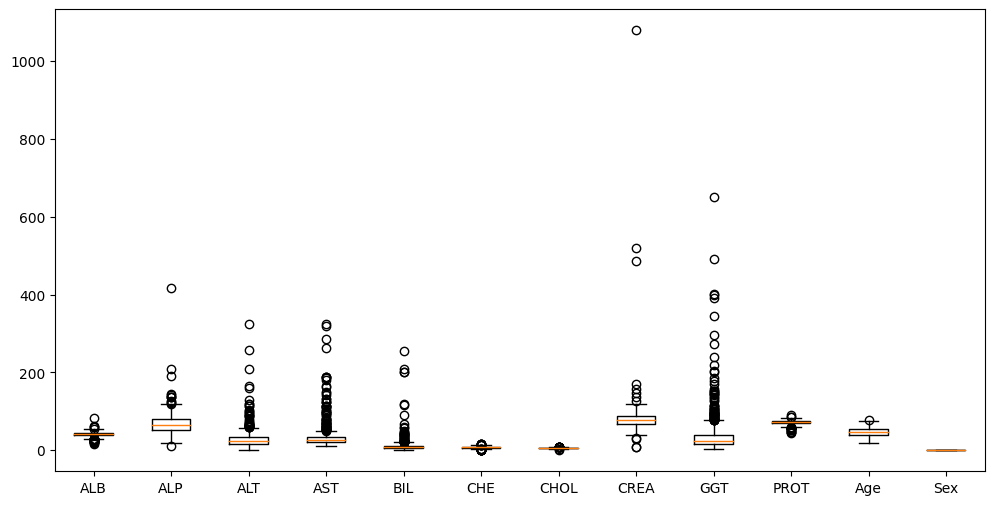

In [ ]:
# range of values for each clinical feature
# list of the columns to plot
columns = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT','Age','Sex']

# creating a box plot for each column of clinical features
plt.figure(figsize=(12,6))
plt.boxplot(df[columns].values, labels=columns, showfliers=True)
plt.show()


Analysis: Yes, there are significant number of outliers in the given dataset . The above boxplot shows that most of the outliers correspond to  clinical features in the dataset. The feature 'CREA' has extreme values.
Demographic features like 'Age' and 'Sex' do not have significant outliers.

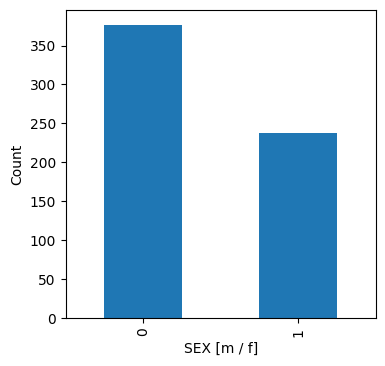

In [ ]:
# distribution of feature 'Sex' in the given dataset
plt.figure(figsize=(4,4))
df.Sex.value_counts().plot(kind='bar')
plt.xlabel("SEX [m / f]")
plt.ylabel("Count")
plt.show()

In [ ]:
df['Sex'].value_counts()

0    377
1    238
Name: Sex, dtype: int64

Analysis : There are 2 gender categories(male and female). The distribution shows that this dataset is skewed toward the male with nearly 61.3%.

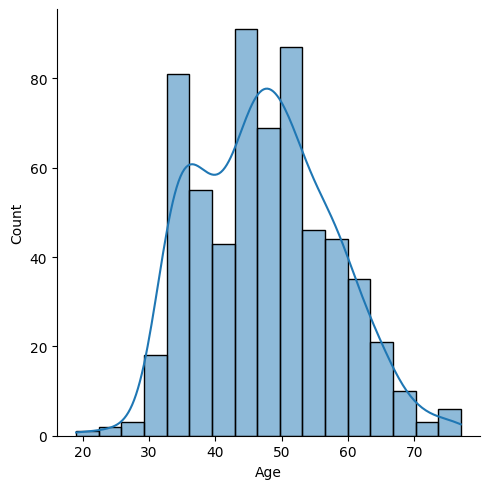

In [ ]:
# distribution and range of values for feature 'Age' in the dataset
sns.displot(df['Age'],kde=True)

Analysis : Maximum patients lie between the ages 40-50 years in the provided dataset.

          Category       Age       Sex       ALB       ALP       ALT  \
Category  1.000000  0.118539 -0.046672 -0.282181 -0.002402  0.066404   
Age       0.118539  1.000000  0.024544 -0.198264  0.164731 -0.005306   
Sex      -0.046672  0.024544  1.000000 -0.145454  0.021419 -0.161155   
ALB      -0.282181 -0.198264 -0.145454  1.000000 -0.131346  0.000826   
ALP      -0.002402  0.164731  0.021419 -0.131346  1.000000  0.124531   
ALT       0.066404 -0.005306 -0.161155  0.000826  0.124531  1.000000   
AST       0.627888  0.088666 -0.130891 -0.193793  0.042589  0.273316   
BIL       0.499905  0.032492 -0.111177 -0.221673  0.034663 -0.038292   
CHE      -0.360195 -0.075093 -0.169111  0.376018  0.038685  0.146451   
CHOL     -0.298951  0.123096  0.027095  0.204583  0.132826  0.067079   
CREA      0.203729 -0.022296 -0.159589 -0.001405  0.150943 -0.042966   
GGT       0.443292  0.153087 -0.133276 -0.156441  0.423254  0.248328   
PROT      0.024525 -0.153659 -0.051216  0.549152 -0.070175  0.09

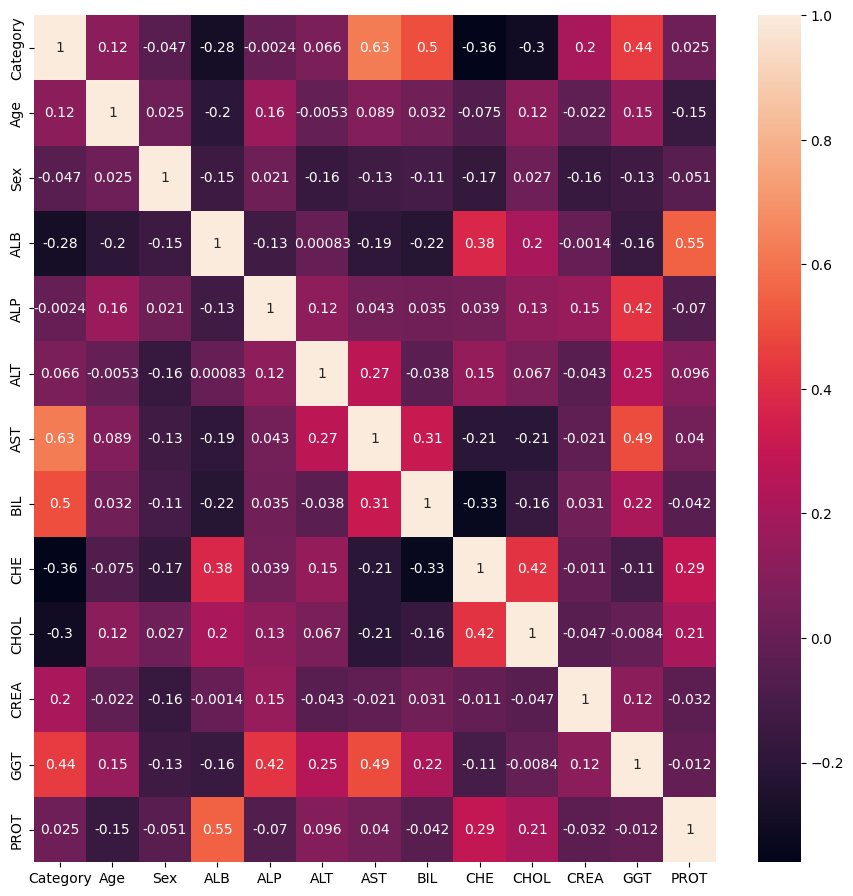

In [ ]:
# increasing the figure size
plt.figure(figsize=(11,11))

print(df.corr())



# plotting correlation matrix
sns.heatmap(df.corr(),annot=True)
plt.show()

Based on the correlation matrix, we can identify the following strong dependencies:

Category and AST: The target variable "Category" has a strong positive correlation of 0.627888 with AST (Aspartate Aminotransferase). This indicates that higher AST values are associated with a higher likelihood of belonging to a certain category.

Category and GGT: The target variable "Category" also has a strong positive correlation of 0.443292 with GGT (Gamma-Glutamyl Transferase). This suggests that higher GGT values are correlated with a higher probability of falling into a particular category.

Category and BIL: The target variable "Category" has a strong positive correlation of 0.499905 with BIL (Bilirubin). This implies that higher BIL values are associated with a higher probability of belonging to a certain category.

ALB and PROT: ALB (Albumin) and PROT (Protein) exhibit a strong positive correlation of 0.549152. This suggests that higher ALB values are correlated with higher PROT values.

<Axes: xlabel='Category', ylabel='count'>

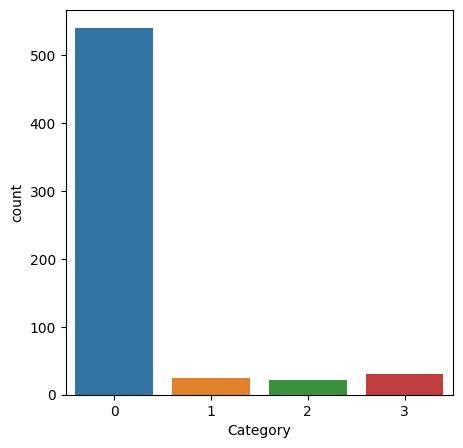

In [ ]:
# to check frequency of each diagnosis category
plt.figure(figsize=(5,5))
sns.countplot(x=df['Category'])

As it is clear from the above countplot that the frequency of patients who are blood donor or suspected blood donor (i.e they fall in category 0 of negative hepatitis c diagnosis) is significantly large.

This imbalance will definitely affect the classification task. If model is trained on this imbalanced data its predictions will be biased towards the majority category i.e category 0 of negative hepatitis C diagnosis.

It can be resolved by using various techniques like undersampling, combination sampling methods or SMOTE(Synthetic Minority Over-sampling Technique)

In [ ]:
# here i am using SMOTE
from imblearn.over_sampling import SMOTE

# Apply SMOTE to oversample the minority class
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(df.drop('Category', axis=1),df['Category'])



In [ ]:
# Data preprocessing and feature engineering

# missing values handling ,feature encoding and imbalances handling are already done

# dealing with outliers
# Specify the columns with significant outliers
outlier_columns = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

# Applying log transformation to handle outliers
for column in outlier_columns:
    df[column] = np.log1p(df[column])

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report



# Split the data into features (X) and target variable (Y)
X = df.drop('Category', axis=1)
Y = df['Category']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Model selection
naive_bayes_classifier = GaussianNB()

# Model training
naive_bayes_classifier.fit(X_train, y_train)

# Making predictions on the test set
predictions = naive_bayes_classifier.predict(X_test)


# Calculating accuracy
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test,predictions)


# Printing the evaluation results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)





Accuracy: 0.9024390243902439
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        99
           1       0.83      0.56      0.67         9
           2       0.50      0.50      0.50         6
           3       0.70      0.78      0.74         9

    accuracy                           0.90       123
   macro avg       0.75      0.70      0.72       123
weighted avg       0.90      0.90      0.90       123



Based on these evaluation metrics, we can observe the following:

Class 0 has high precision, recall, and F1-score, indicating that the classifier performs well in identifying this class.

Class 1 has a relatively lower recall and F1-score, suggesting that the classifier struggles to correctly identify instances of this class. However, the precision is reasonable.

Class 2 also has moderate precision, recall, and F1-score, indicating average performance.

Class 3 demonstrates a relatively higher recall and F1-score, suggesting that the classifier performs well in identifying instances of this class.

The weighted average F1-score of 0.90 indicates that the classifier achieves a good balance between precision and recall across all classes.